# Analyse et détection de la dépression

In [1]:
#package et chargement fichiers

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
demo = pd.read_csv("D:/git-projets/Depression-analysis/Demographic_symptom.csv", index_col = 0)


nettoyage des données

In [3]:
"""
intervalle de score attendus :

shaps : 14 à 56
psqi 0 à 21
madrs : 0 à 60
hamd 17 : 0 à 52
hamd 21 : 0 à 60
ham-a : 0 à 56
poms-tension : 0à 36
poms-depression : 0 à 60
poms-agressivité : 0 à48 
poms-fatigue : 0 à 28
poms-relation-pers : 0 à 28
poms-confusion : 0 à 28
poms-vigueur : 0 à 32
poms-total : -32 à 68
qids_sleep_score : 0 à 3
qids_appetite_score : 0 à 3
qids_psychomotor_score : 0 à 3
qids_total : 0 à 27

"""
#exploration
#afficher le détail du df
print(demo.head)
print(demo.info())


<bound method NDFrame.head of       batch   age     sex Diag  \
AA003   1st  45.0  Female   HC   
AA101   3rd  26.0  Female   HC   
AA115   1st  44.0  Female   HC   
AA296   2nd  27.0    Male   HC   
AA328   1st  51.0    Male  MDD   
...     ...   ...     ...  ...   
AN466   4th  28.0    Male  MDD   
AN736   4th  22.0  Female  MDD   
AN965   4th  29.0    Male  MDD   
AO427   4th  26.0    Male  MDD   
AO507   4th  23.0    Male  MDD   

                                     PrimaryDiagnosis  hs-CRP  shaps_score  \
AA003                      Healthy_Control,_High_Risk    0.40         25.0   
AA101                                 Healthy_Control     NaN         15.0   
AA115                                 Healthy_Control    6.90         16.0   
AA296                                 Healthy_Control    0.60         14.0   
AA328  Major_Depressive_Disorder,_Recurrent,_Moderate    1.60         24.0   
...                                               ...     ...          ...   
AN466          

In [4]:
#redéfinir le nom de la colonne hs-CRP
demo.rename(columns={'hs-CRP': 'hs_CRP'}, inplace=True)


In [5]:

#filtre des valeurs abberrantes

shaps_filter = (demo.shaps_score >= 14) & (demo.shaps_score <= 56)
psqi_filter = demo.psqi_score <= 21
madrs_filter = demo.madrs_score <= 60
hamd17_filter = demo.hamd_hamd17_score <= 52
hamd21_filter = demo.hamd_hamd21_score <= 60
hama_filter = demo.hama_score <= 56
poms_filter_tension = demo.poms_score_tension <= 36
poms_filter_depression = demo.poms_score_depression <= 60
poms_filter_anger = demo.poms_score_anger <= 48
poms_filter_fatigue = demo.poms_score_fatigue <= 28
poms_filter_friendliness = demo.poms_score_friendliness<=28
poms_filter_confusion = demo.poms_score_confusion <= 28
poms_filter_vigour = demo.poms_score_vigour <= 32
poms_filter_tmd = (demo.poms_score_tmd >= -32) & (demo.poms_score_tmd <= 168)
qids_sleep_filter = demo.qids_sleep_score <= 3
qids_appetite_filter = demo.qids_appetite_score <= 3
qids_psychomotor_filter = demo.qids_psychomotor_score <= 3
qids_filter = demo.qids_score <= 27
MADRS_Q1_filter = (demo.MADRS_Q1 >= 0) & (demo.MADRS_Q1 <= 6)
MADRS_Q2_filter = (demo.MADRS_Q2 >= 0) & (demo.MADRS_Q2 <= 6)
MADRS_Q3_filter = (demo.MADRS_Q3 >= 0) & (demo.MADRS_Q3 <= 6)
MADRS_Q4_filter = (demo.MADRS_Q4 >= 0) & (demo.MADRS_Q4 <= 6)
MADRS_Q5_filter = (demo.MADRS_Q5 >= 0) & (demo.MADRS_Q5 <= 6)
MADRS_Q6_filter = (demo.MADRS_Q6 >= 0) & (demo.MADRS_Q6 <= 6)
MADRS_Q7_filter = (demo.MADRS_Q7 >= 0) & (demo.MADRS_Q7 <= 6)
MADRS_Q8_filter = (demo.MADRS_Q8 >= 0) & (demo.MADRS_Q8 <= 6)
MADRS_Q9_filter = (demo.MADRS_Q9 >= 0) & (demo.MADRS_Q9 <= 6)
MADRS_Q10_filter = (demo.MADRS_Q10 >= 0) & (demo.MADRS_Q10 <= 6)

all_filter_abber = shaps_filter & psqi_filter & madrs_filter & hamd17_filter & hamd21_filter & hama_filter & poms_filter_tension & poms_filter_depression & poms_filter_anger & poms_filter_fatigue & poms_filter_friendliness & poms_filter_confusion & poms_filter_vigour & poms_filter_tmd & qids_sleep_filter & qids_appetite_filter & qids_psychomotor_filter & qids_filter & MADRS_Q1_filter & MADRS_Q2_filter & MADRS_Q3_filter & MADRS_Q4_filter & MADRS_Q5_filter & MADRS_Q6_filter & MADRS_Q7_filter & MADRS_Q8_filter & MADRS_Q9_filter & MADRS_Q10_filter



In [6]:
#suppression des valeurs manquantes
nna_hs_CRP = demo.hs_CRP.notna()
shaps_nna = demo.shaps_score.notna()
psqi_nna = demo.psqi_score.notna()
madrs_nna = demo.madrs_score.notna()
hamd17_nna = demo.hamd_hamd17_score.notna()
hamd21_nna = demo.hamd_hamd21_score.notna()
hama_nna = demo.hama_score.notna()
poms_nna_tension = demo.poms_score_tension.notna()
poms_nna_depression = demo.poms_score_depression.notna()
poms_nna_anger = demo.poms_score_anger.notna()
poms_nna_fatigue = demo.poms_score_fatigue.notna()
poms_nna_friendliness = demo.poms_score_friendliness.notna()
poms_nna_confusion = demo.poms_score_confusion.notna()
poms_nna_vigour = demo.poms_score_vigour.notna()
poms_nna_tmd = demo.poms_score_tmd.notna()
qids_nna_psychomotor = demo.qids_psychomotor_score.notna()
qids_nna_sleep = demo.qids_sleep_score.notna()
qids_nna_appetite = demo.qids_appetite_score.notna()
qids_nna = demo.qids_score.notna()
MADRS_Q1_nna = demo.MADRS_Q1.notna()
MADRS_Q2_nna = demo.MADRS_Q2.notna()
MADRS_Q3_nna = demo.MADRS_Q3.notna()
MADRS_Q4_nna = demo.MADRS_Q4.notna()
MADRS_Q5_nna = demo.MADRS_Q5.notna()
MADRS_Q6_nna = demo.MADRS_Q6.notna()
MADRS_Q7_nna= demo.MADRS_Q7.notna()
MADRS_Q8_nna = demo.MADRS_Q8.notna()
MADRS_Q9_nna = demo.MADRS_Q9.notna()
MADRS_Q10_nna = demo.MADRS_Q10.notna()
ctq_denial_nna = demo.ctq_denial_score.notna()
ctq_emoabuse_nna = demo.ctq_emoabuse_score.notna()
ctq_emoneglect_nna = demo.ctq_emoneglect_score.notna()
ctq_physabuse_nna = demo.ctq_physabuse_score.notna()
ctq_physneglect_nna = demo.ctq_physneglect_score.notna()
ctq_sexabuse_nna = demo.ctq_sexabuse_score.notna()
ctq_score_nna = demo.ctq_score.notna()
tci_coop_nna = demo.tci_coop_score.notna()
tci_harmavoid_nna = demo.tci_harmavoid_score.notna()
tci_noveltyseek_nna = demo.tci_noveltyseek_score.notna()
tci_persistence_nna = demo.tci_persistence_score.notna()
tci_rewarddep_nna = demo.tci_rewarddep_score.notna()
tci_selfdirect_nna = demo.tci_selfdirect_score.notna()
tci_selftranscend_nna = demo.tci_selftranscend_score.notna()
tci_impulsivity_nna = demo.tci_impulsivity_score.notna()
PrimaryDiagnosis_nna = demo.PrimaryDiagnosis.notna()

all_nna_spd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna
all_nna_pd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna & PrimaryDiagnosis_nna


In [7]:
#création des dataset spd et pd
all_filter_spd = all_nna_spd & all_filter_abber
all_filter_pd = all_nna_pd & all_filter_abber

demo_net_spd = demo[all_filter_spd]
demo_net_pd = demo[all_filter_pd]

demo_net_spd = demo_net_spd.drop(["PrimaryDiagnosis"], axis=1)
demo_net_spd.info()
demo_net_pd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
batch                      123 non-null object
age                        123 non-null float64
sex                        123 non-null object
Diag                       123 non-null object
hs_CRP                     123 non-null float64
shaps_score                123 non-null float64
psqi_score                 123 non-null float64
ctq_denial_score           123 non-null float64
ctq_emoabuse_score         123 non-null float64
ctq_emoneglect_score       123 non-null float64
ctq_physabuse_score        123 non-null float64
ctq_physneglect_score      123 non-null float64
ctq_sexabuse_score         123 non-null float64
ctq_score                  123 non-null float64
madrs_score                123 non-null float64
hamd_hamd17_score          123 non-null float64
hamd_hamd21_score          123 non-null float64
hama_score                 123 non-null float64
poms_score_tension         123 no

In [8]:
#renommer les colonnes des questions madrs
demo_net_spd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)

demo_net_pd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)


c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


ANALYSE DE DONNEES

STAT A PARTIR DU DATASET SANS PRIMARY DIAGNOSIS

In [9]:
#create crosstab sex diag
t = pd.crosstab(demo_net_spd.Diag, "freq")
s = pd.crosstab(demo_net_spd.sex, "freq")
print(t)
print(s)


col_0  freq
Diag       
HC       74
MDD      49
col_0   freq
sex         
Female    67
Male      56


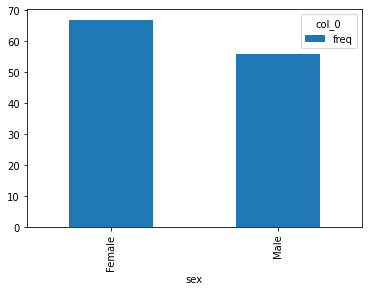

In [10]:

# Create bar diag of Diag sex
s.plot.bar()
plt.show()


il y légèrement plus de femmes que d'hommes. + 10 de femmes que d'hommes

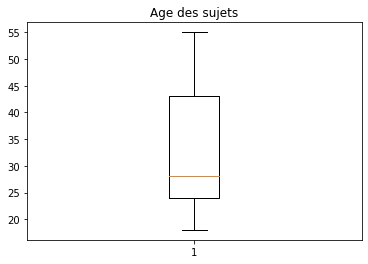

In [11]:
plt.boxplot(demo_net_spd.age)
plt.title('Age des sujets')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB0330FCD0>,
      dtype=object)

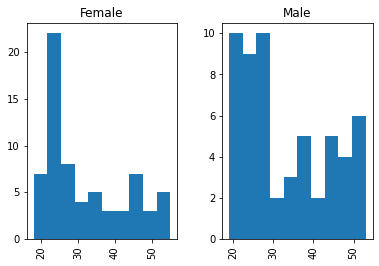

In [12]:
demo_net_spd.hist(column='age',by='sex')

la disparité des ages des hommes est plus homogène que chez les femmes. on observe un pic de 20 femmes entre 23 et 25 ans. 

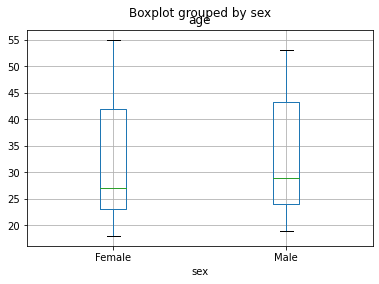

In [13]:
demo_net_spd.boxplot(column='age',by='sex')

La médiane des ages chez les femmes est à 27 ans, chez les hommes elle est à 29 ans. la population des femmes est légèrement plus jeune

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB033EEF40>,
      dtype=object)

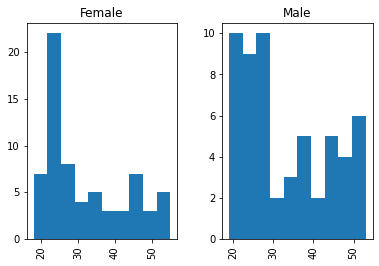

In [14]:

demo_net_spd.hist(column='age',by='sex')

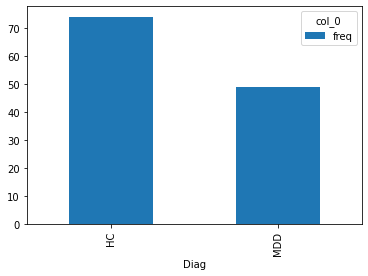

In [15]:
t.plot.bar()
plt.show()


on observe plus d'individus diagnostiqués sans dépression que d'individus souffrant de dépression.

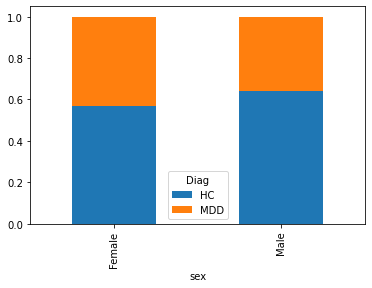

In [16]:
ct = pd.crosstab(demo_net_spd['sex'],demo_net_spd['Diag'],normalize='index')
ct.plot.bar(stacked=True)

près de la moitié des femmes est diagnostiquée en dépression. près d'1/3 des hommes est diagnostiqué en dépression

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB035CE220>,
      dtype=object)

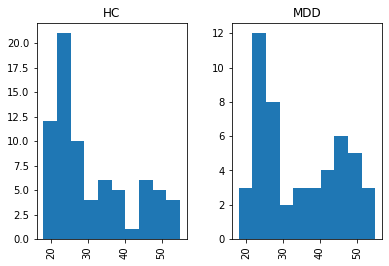

In [17]:
demo_net_spd.hist(column='age',by='Diag')

on observe plus de personnes diagnostiquées positives à partir de 40 ans, par rapport à la dispersion du groupe contrôle.

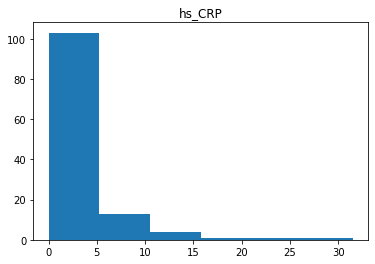

In [18]:
plt.hist(demo_net_spd.hs_CRP, bins = 6)
plt.title("hs_CRP")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB03698D30>,
      dtype=object)

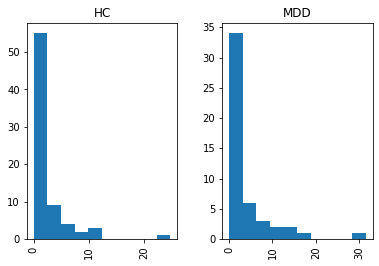

In [19]:
demo_net_spd.hist(column='hs_CRP',by='Diag')

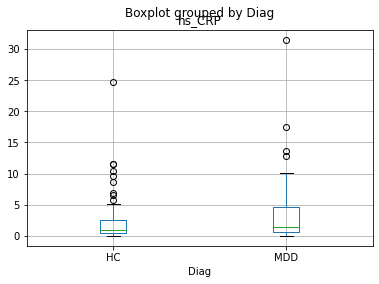

In [20]:
demo_net_spd.boxplot(column='hs_CRP',by='Diag')

Le score de hs-CRP peut être plus élevé pour les personnes diagnostiquées en dépression.

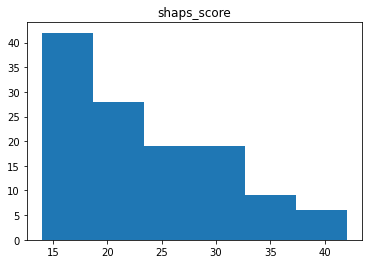

In [21]:
plt.hist(demo_net_spd.shaps_score, bins = 6)
plt.title("shaps_score")
plt.show()

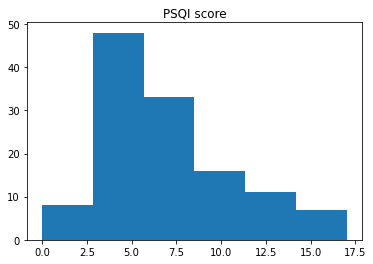

In [22]:
plt.hist(demo_net_spd.psqi_score, bins=6)
plt.title('PSQI score')
plt.show()

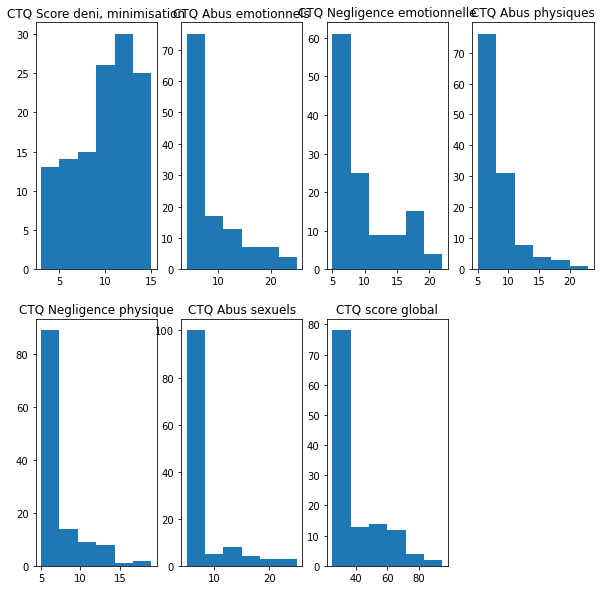

In [23]:

fig1 = plt.figure(figsize=(10,10))
ax11 = fig1.add_subplot(2,4,1)
ax21 = fig1.add_subplot(2,4,2)
ax31 = fig1.add_subplot(2,4,3)
ax41 = fig1.add_subplot(2,4,4)
ax51 = fig1.add_subplot(2,4,5)
ax61 = fig1.add_subplot(2,4,6)
ax71 = fig1.add_subplot(2,4,7)
ax11.title.set_text('CTQ Score deni, minimisation')
ax21.title.set_text('CTQ Abus emotionnels')
ax31.title.set_text('CTQ Negligence emotionnelle')
ax41.title.set_text('CTQ Abus physiques')
ax51.title.set_text('CTQ Negligence physique')
ax61.title.set_text('CTQ Abus sexuels')
ax71.title.set_text('CTQ score global')
ax11.hist(demo_net_spd.ctq_denial_score,bins = 6)
ax21.hist(demo_net_spd.ctq_emoabuse_score,bins = 6)
ax31.hist(demo_net_spd.ctq_emoneglect_score,bins = 6)
ax41.hist(demo_net_spd.ctq_physabuse_score,bins = 6)
ax51.hist(demo_net_spd.ctq_physneglect_score,bins = 6)
ax61.hist(demo_net_spd.ctq_sexabuse_score,bins = 6)
ax71.hist(demo_net_spd.ctq_score,bins = 6)
plt.show()

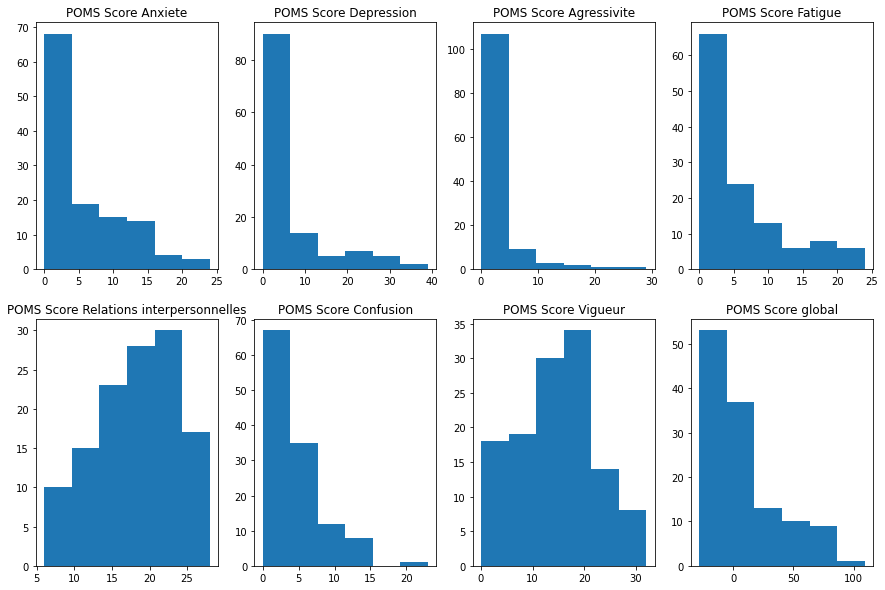

In [24]:

fig3 = plt.figure(figsize=(15,10))
ax12 = fig3.add_subplot(2,4,1)
ax22 = fig3.add_subplot(2,4,2)
ax32 = fig3.add_subplot(2,4,3)
ax42 = fig3.add_subplot(2,4,4)
ax52 = fig3.add_subplot(2,4,5)
ax62 = fig3.add_subplot(2,4,6)
ax72 = fig3.add_subplot(2,4,7)
ax82 = fig3.add_subplot(2,4,8)
ax12.title.set_text('POMS Score Anxiete')
ax22.title.set_text('POMS Score Depression')
ax32.title.set_text('POMS Score Agressivite')
ax42.title.set_text('POMS Score Fatigue')
ax52.title.set_text('POMS Score Relations interpersonnelles')
ax62.title.set_text('POMS Score Confusion')
ax72.title.set_text('POMS Score Vigueur')
ax82.title.set_text('POMS Score global')
ax12.hist(demo_net_spd.poms_score_tension,bins = 6)
ax22.hist(demo_net_spd.poms_score_depression,bins = 6)
ax32.hist(demo_net_spd.poms_score_anger,bins = 6)
ax42.hist(demo_net_spd.poms_score_fatigue,bins = 6)
ax52.hist(demo_net_spd.poms_score_friendliness,bins = 6)
ax62.hist(demo_net_spd.poms_score_confusion,bins = 6)
ax72.hist(demo_net_spd.poms_score_vigour,bins = 6)
ax82.hist(demo_net_spd.poms_score_tmd,bins = 6)
plt.show()

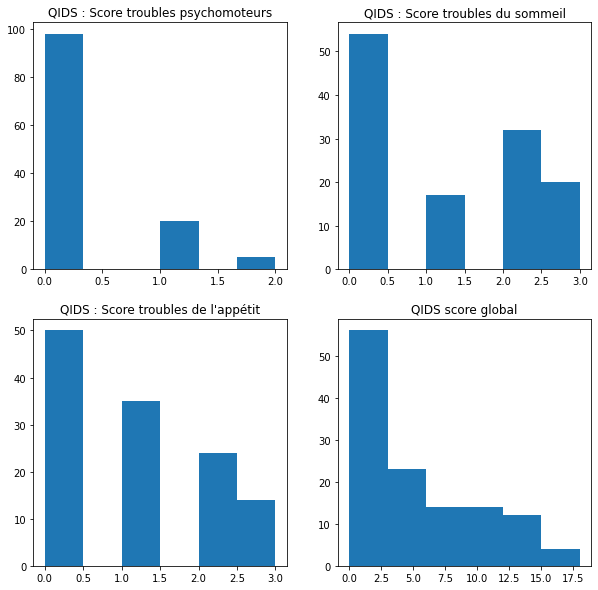

In [25]:
fig2 = plt.figure(figsize=(10,10))
ax10 = fig2.add_subplot(2,2,1)
ax20 = fig2.add_subplot(2,2,2)
ax30 = fig2.add_subplot(2,2,3)
ax40 = fig2.add_subplot(2,2,4)
ax10.title.set_text('QIDS : Score troubles psychomoteurs')
ax20.title.set_text('QIDS : Score troubles du sommeil')
ax30.title.set_text("QIDS : Score troubles de l'appétit")
ax40.title.set_text('QIDS score global')
ax10.hist(demo_net_spd.qids_psychomotor_score,bins = 6)
ax20.hist(demo_net_spd.qids_sleep_score,bins = 6)
ax30.hist(demo_net_spd.qids_appetite_score,bins = 6)
ax40.hist(demo_net_spd.qids_score,bins = 6)
plt.show()

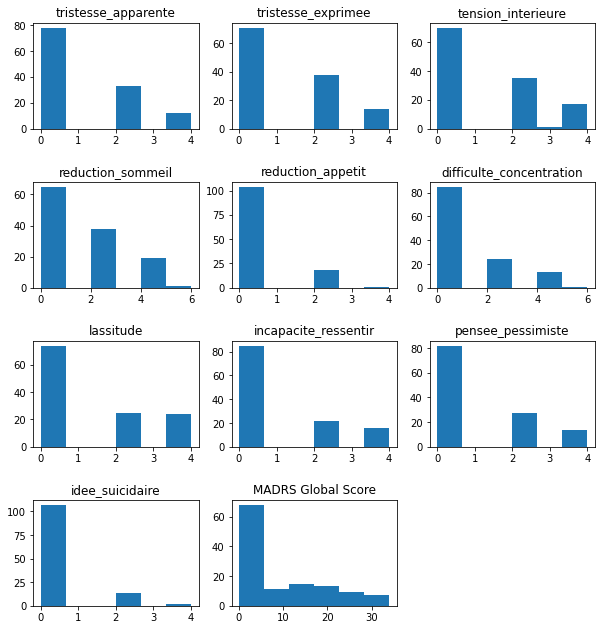

In [26]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax1.title.set_text('tristesse_apparente')
ax2.title.set_text('tristesse_exprimee')
ax3.title.set_text('tension_interieure')
ax4.title.set_text('reduction_sommeil')
ax5.title.set_text('reduction_appetit')
ax6.title.set_text('difficulte_concentration')
ax7.title.set_text('lassitude')
ax8.title.set_text('incapacite_ressentir')
ax9.title.set_text('pensee_pessimiste')
ax10.title.set_text('idee_suicidaire')
ax1.hist(demo_net_spd.tristesse_apparente,bins = 6)
ax2.hist(demo_net_spd.tristesse_exprimee,bins = 6)
ax3.hist(demo_net_spd.tension_interieure,bins = 6)
ax4.hist(demo_net_spd.reduction_sommeil,bins = 6)
ax5.hist(demo_net_spd.reduction_appetit,bins = 6)
ax6.hist(demo_net_spd.difficulte_concentration,bins = 6)
ax7.hist(demo_net_spd.lassitude,bins = 6)
ax8.hist(demo_net_spd.incapacite_ressentir,bins = 6)
ax9.hist(demo_net_spd.pensee_pessimiste,bins = 6)
ax10.hist(demo_net_spd.idee_suicidaire,bins = 6)
ax11 = fig.add_subplot(4,3,11)
ax11.title.set_text('MADRS Global Score')
ax11.hist(demo_net_spd.madrs_score, bins=6)
fig.subplots_adjust(left=0.12, bottom=0.11, right=0.90, top=0.92, wspace=0.2, hspace=0.5)
plt.show()


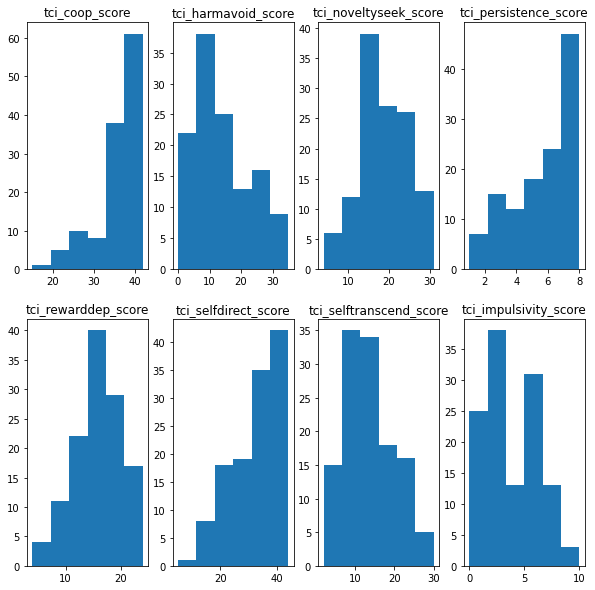

In [27]:

fag = plt.figure(figsize=(10,10))
az1 = fag.add_subplot(2,4,1)
az2 = fag.add_subplot(2,4,2)
az3 = fag.add_subplot(2,4,3)
az4 = fag.add_subplot(2,4,4)
az5 = fag.add_subplot(2,4,5)
az6 = fag.add_subplot(2,4,6)
az7 = fag.add_subplot(2,4,7)
az8 = fag.add_subplot(2,4,8)
az1.title.set_text('tci_coop_score')
az2.title.set_text('tci_harmavoid_score')
az3.title.set_text('tci_noveltyseek_score')
az4.title.set_text('tci_persistence_score')
az5.title.set_text('tci_rewarddep_score')
az6.title.set_text('tci_selfdirect_score')
az7.title.set_text('tci_selftranscend_score')
az8.title.set_text('tci_impulsivity_score')
az1.hist(demo_net_spd.tci_coop_score,bins = 6)
az2.hist(demo_net_spd.tci_harmavoid_score,bins = 6)
az3.hist(demo_net_spd.tci_noveltyseek_score,bins = 6)
az4.hist(demo_net_spd.tci_persistence_score,bins = 6)
az5.hist(demo_net_spd.tci_rewarddep_score,bins = 6)
az6.hist(demo_net_spd.tci_selfdirect_score,bins = 6)
az7.hist(demo_net_spd.tci_selftranscend_score,bins = 6)
az8.hist(demo_net_spd.tci_impulsivity_score,bins = 6)
plt.show()


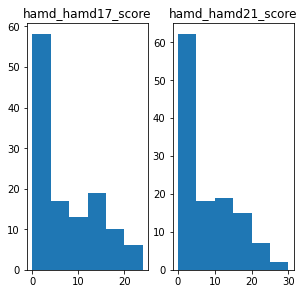

In [28]:
fog = plt.figure(figsize=(10,10))
az11 = fog.add_subplot(2,4,1)
az12 = fog.add_subplot(2,4,2)
az11.title.set_text('hamd_hamd17_score')
az12.title.set_text('hamd_hamd21_score')
az11.hist(demo_net_spd.hamd_hamd17_score,bins = 6)
az12.hist(demo_net_spd.hamd_hamd21_score,bins = 6)

plt.show()

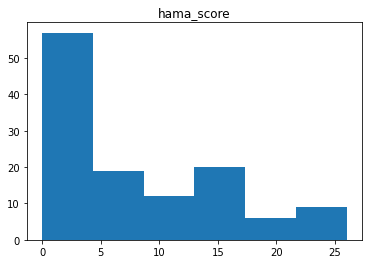

In [29]:
plt.hist(demo_net_spd.hama_score,bins = 6)
plt.title("hama_score")
plt.show()



In [30]:
#some statistics

print(demo_net_spd.describe(include='all'))

       batch         age     sex Diag      hs_CRP  shaps_score  psqi_score  \
count    123  123.000000     123  123  123.000000   123.000000  123.000000   
unique     4         NaN       2    2         NaN          NaN         NaN   
top      2nd         NaN  Female   HC         NaN          NaN         NaN   
freq      33         NaN      67   74         NaN          NaN         NaN   
mean     NaN   32.373984     NaN  NaN    3.025935    22.845528    6.894309   
std      NaN   10.812408     NaN  NaN    4.654423     7.220227    3.819306   
min      NaN   18.000000     NaN  NaN    0.000000    14.000000    0.000000   
25%      NaN   24.000000     NaN  NaN    0.500000    16.000000    4.000000   
50%      NaN   28.000000     NaN  NaN    1.300000    23.000000    6.000000   
75%      NaN   43.000000     NaN  NaN    3.350000    28.000000    9.000000   
max      NaN   55.000000     NaN  NaN   31.500000    42.000000   17.000000   

        ctq_denial_score  ctq_emoabuse_score  ctq_emoneglect_sc

Sélection de variable

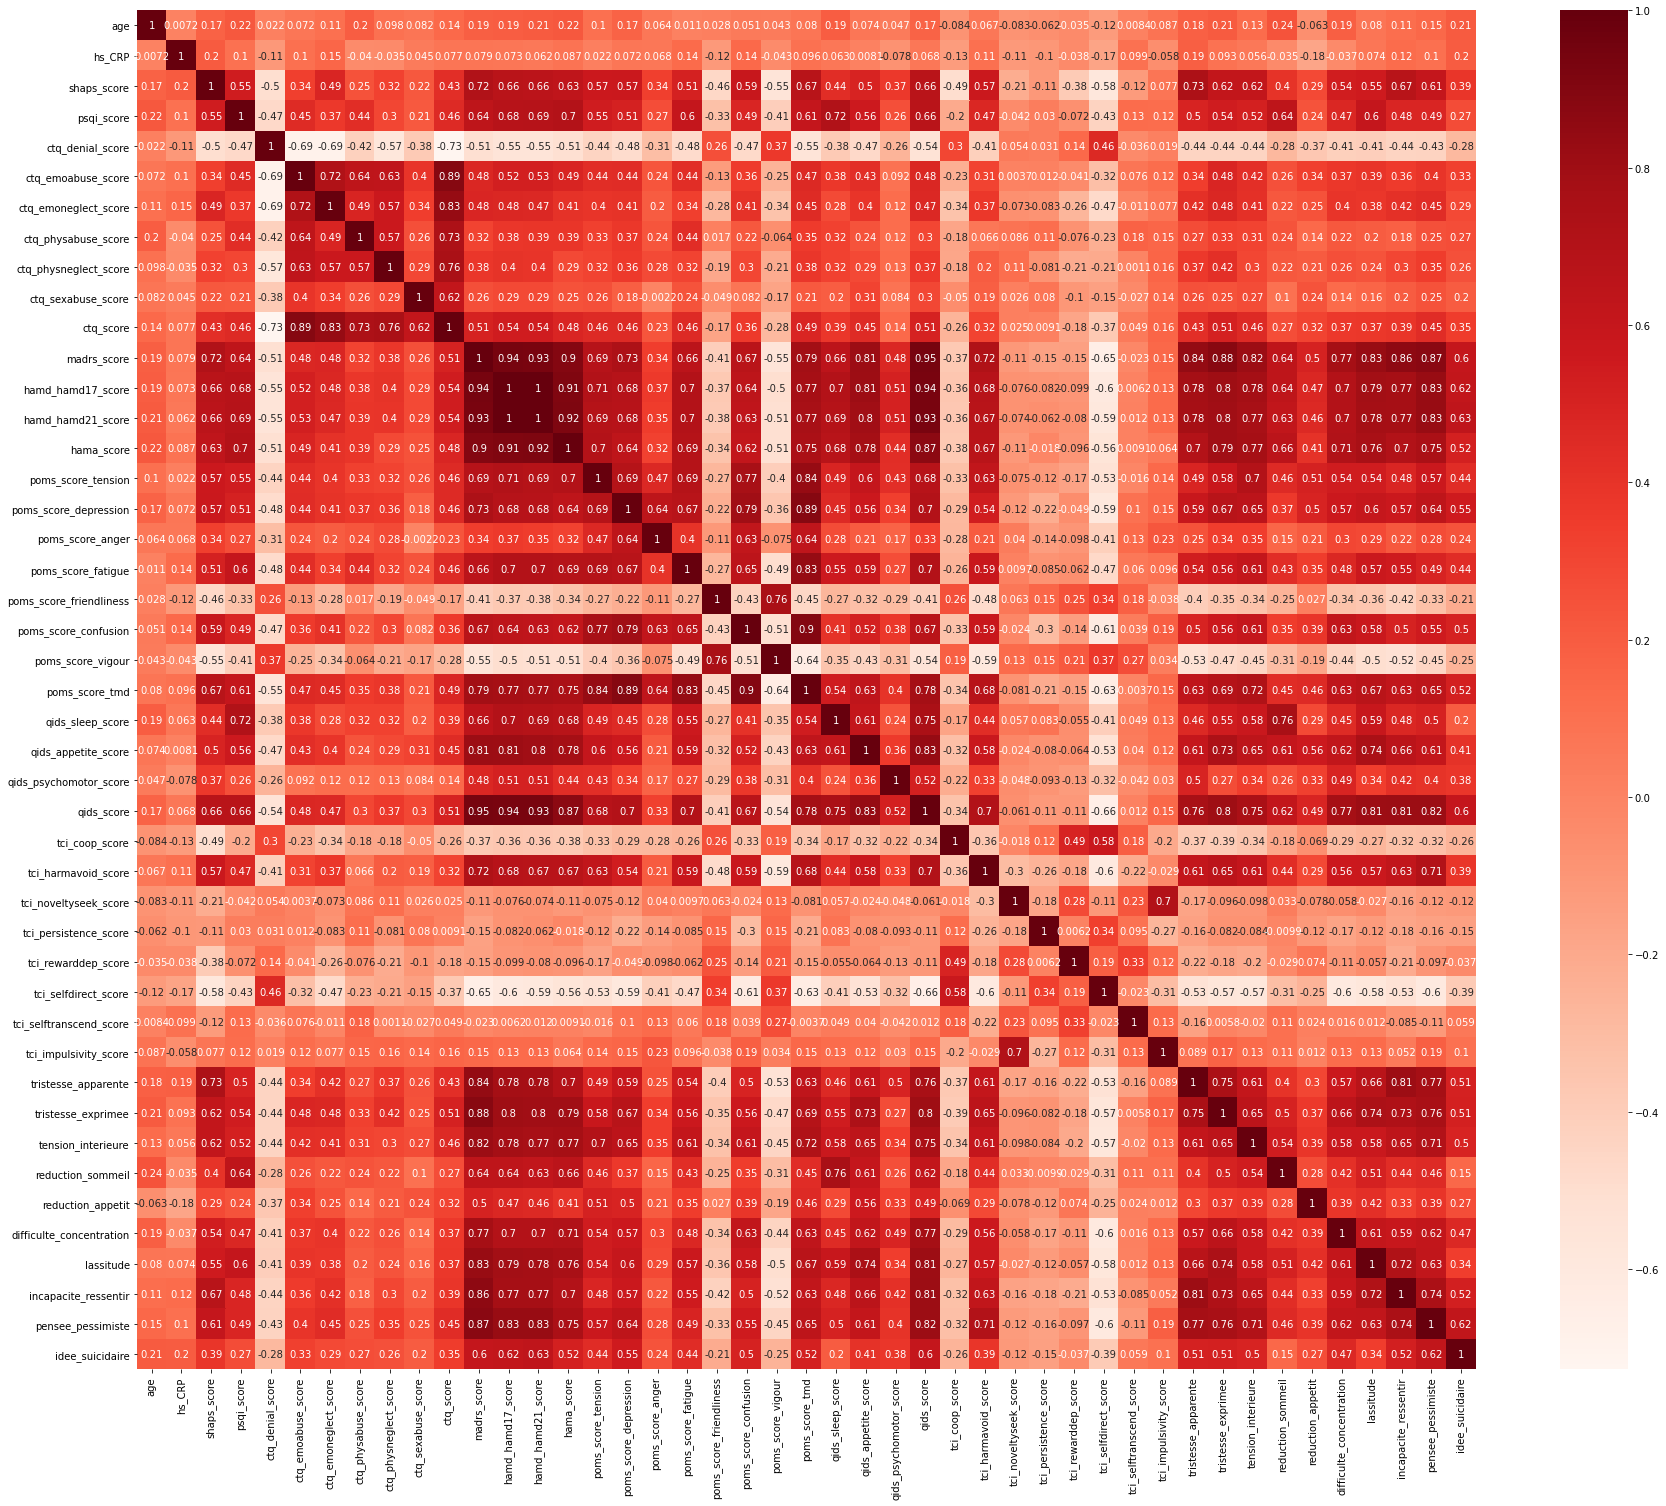

In [31]:
# matrice de corrélation
plt.figure(figsize=(30,25))
cor = demo_net_spd.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [32]:
#Correlation with output variable
cor_target = abs(cor["hs_CRP"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

hs_CRP    1.0
Name: hs_CRP, dtype: float64

In [33]:
#Correlation with output variable
cor_target = abs(cor["age"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

age    1.0
Name: age, dtype: float64

In [34]:
#Correlation with output variable
cor_target = abs(cor["tci_selftranscend_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_selftranscend_score    1.0
Name: tci_selftranscend_score, dtype: float64

In [35]:
#Correlation with output variable
cor_target = abs(cor["qids_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score                 0.945975
hamd_hamd17_score           0.936099
hamd_hamd21_score           0.933625
hama_score                  0.871623
poms_score_depression       0.700413
poms_score_tmd              0.777933
qids_sleep_score            0.746338
qids_appetite_score         0.831769
qids_score                  1.000000
tci_harmavoid_score         0.703901
tristesse_apparente         0.758791
tristesse_exprimee          0.799743
tension_interieure          0.746232
difficulte_concentration    0.773758
lassitude                   0.806249
incapacite_ressentir        0.811192
pensee_pessimiste           0.816728
Name: qids_score, dtype: float64

In [36]:
#Correlation with output variable
cor_target = abs(cor["tci_selfdirect_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

madrs_score                 0.651161
hamd_hamd17_score           0.602647
poms_score_confusion        0.614257
poms_score_tmd              0.627582
qids_score                  0.659401
tci_harmavoid_score         0.600983
tci_selfdirect_score        1.000000
difficulte_concentration    0.600431
pensee_pessimiste           0.602537
Name: tci_selfdirect_score, dtype: float64

In [37]:
#Correlation with output variable
cor_target = abs(cor["ctq_denial_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

ctq_denial_score    1.000000
ctq_score           0.727377
Name: ctq_denial_score, dtype: float64

In [38]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

In [39]:
var_quanti = demo_net_spd.drop(['batch','sex'], 1)

print(var_quanti.info())


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 46 columns):
age                         123 non-null float64
Diag                        123 non-null object
hs_CRP                      123 non-null float64
shaps_score                 123 non-null float64
psqi_score                  123 non-null float64
ctq_denial_score            123 non-null float64
ctq_emoabuse_score          123 non-null float64
ctq_emoneglect_score        123 non-null float64
ctq_physabuse_score         123 non-null float64
ctq_physneglect_score       123 non-null float64
ctq_sexabuse_score          123 non-null float64
ctq_score                   123 non-null float64
madrs_score                 123 non-null float64
hamd_hamd17_score           123 non-null float64
hamd_hamd21_score           123 non-null float64
hama_score                  123 non-null float64
poms_score_tension          123 non-null float64
poms_score_depression       123 non-null float64
poms_score_an

c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

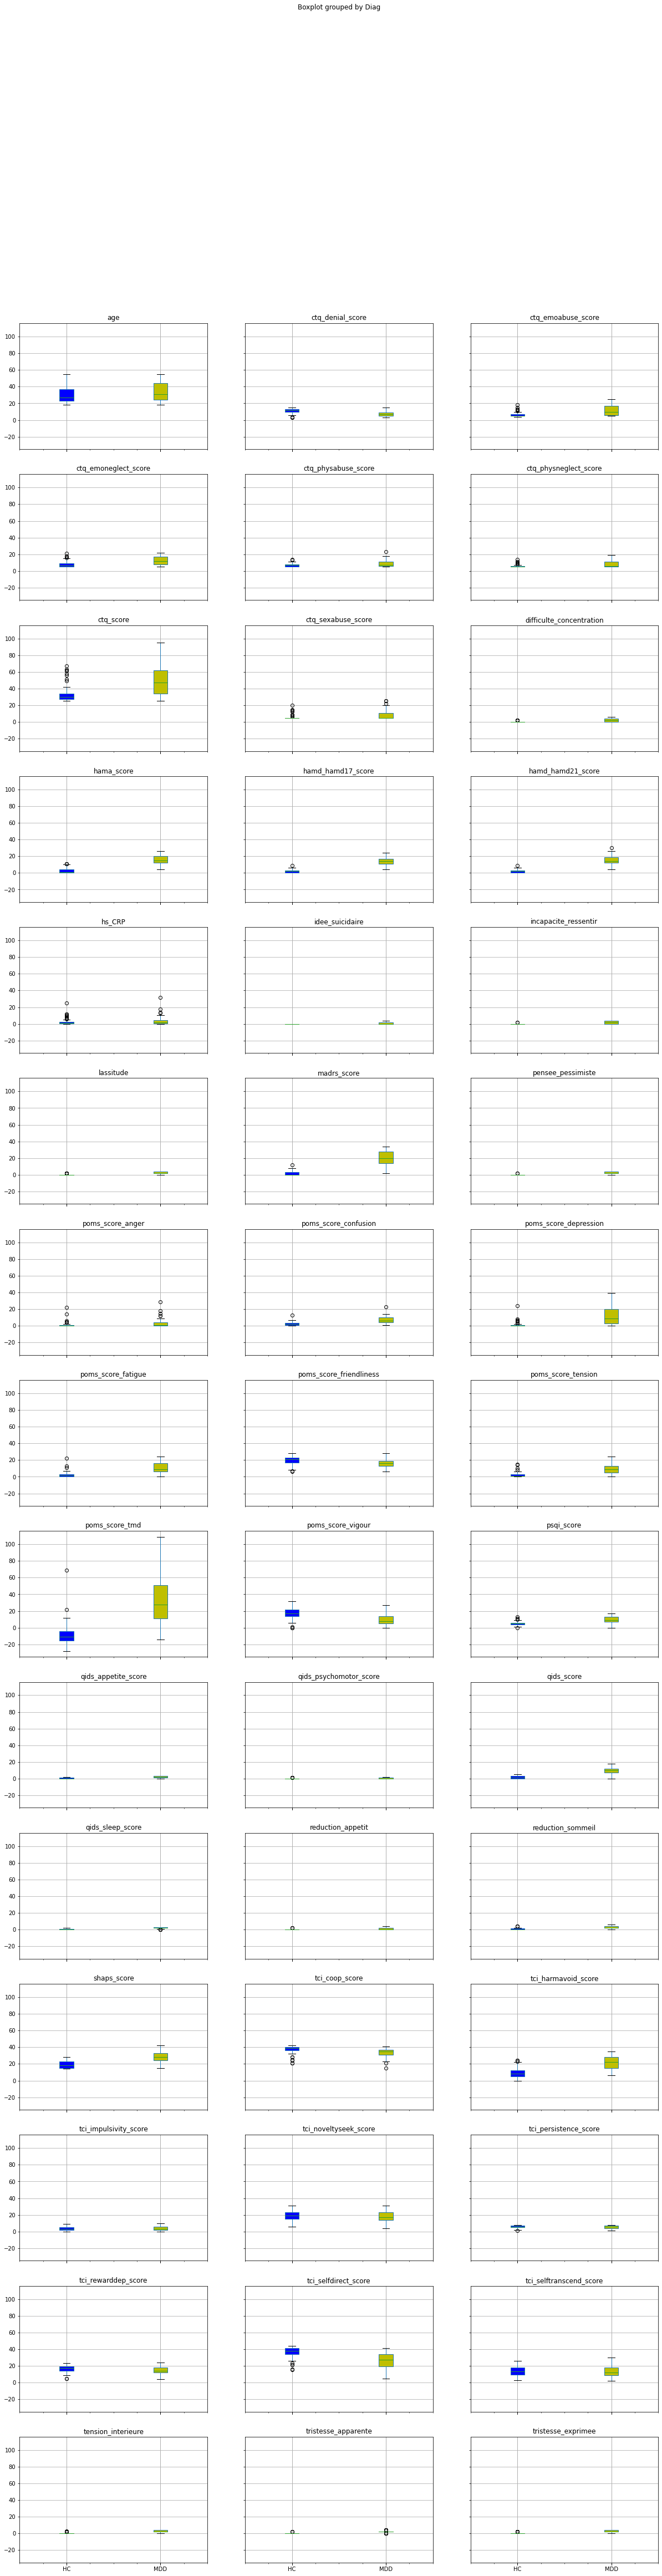

In [40]:
df = var_quanti
bp_dict = df.boxplot(
    by="Diag",layout=(20,3),figsize=(20,100),
    return_type='both',
    patch_artist = True,
)

colors = ['b', 'y', 'm', 'c', 'g', 'b', 'r', 'k', ]
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

plt.show()

poms : état émotionnel et dépressionnel, humeur
ctq : abus et négligence dans l'enfance
hama : anxiété
harmavoid : évitement du danger
les scores sont plus élevés et/ou plus largement répartis en MDD par rapport au groupe contrôle


In [41]:
print(demo_net_spd.info())
print(demo_net_spd.head())

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
batch                       123 non-null object
age                         123 non-null float64
sex                         123 non-null object
Diag                        123 non-null object
hs_CRP                      123 non-null float64
shaps_score                 123 non-null float64
psqi_score                  123 non-null float64
ctq_denial_score            123 non-null float64
ctq_emoabuse_score          123 non-null float64
ctq_emoneglect_score        123 non-null float64
ctq_physabuse_score         123 non-null float64
ctq_physneglect_score       123 non-null float64
ctq_sexabuse_score          123 non-null float64
ctq_score                   123 non-null float64
madrs_score                 123 non-null float64
hamd_hamd17_score           123 non-null float64
hamd_hamd21_score           123 non-null float64
hama_score                  123 non-null float64
poms_score_tens

EXPLORATION DES DONNEES

PCA

Etape de réalisation de PCA :

sélectionner les variables actives : les variables pour lesquelles on veut expliquer les relations - à projeter sur le plan orthogonal - idéal : même unité de mesure
centrer et réduire
réaliser l'ACP
choisir le nombre de dimension à interpréter : vérifier le nombre de dimensions expliquant la variance, vérifier si la variance expliquée par les axes est suffisante au regard de n ind et p var
analyser les résultats de l'ajustement du nuage de points : projection des variables et barycentre des individus qui prennent les modalités d'une var quali
utiliser les indicateurs pour enrichir l'interprétation
revenir aux données brutes pour interpréter

pour réaliser une PCA, il faut un rapport de 3 entre n individus et p variables.


In [42]:
n = demo_net_spd.shape[0]
p = demo_net_spd.shape[1]
print("le nombre de variables pour l'acp doit être de : " + str(123/3) + " or nous avons " + str(p - 2)+ " variables quantitatives")

le nombre de variables pour l'acp doit être de : 41.0 or nous avons 48 variables


In [43]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

Nous cherchons à maximiser la variance expliquée par 2 axes. nous avons choisi de créer plusieurs ACP à partir des critères suivants :
- un ACP avec les variables relatives aux scores mesurant l'état psychologique (dépression) et émotionnel : soient les variables shaps, psqi, hamd17, hama, qids, madrs et poms (17 variables)
- un ACP avec les variables relatives aux scores mesurant le tempérament et le caractère : soient les variables tci (8 variables)
- un ACP avec les variables relatives aux scores mesurant les abus et négligences infantiles vécues : soient les variables ctq (7 variables)

Pour l'ACP 1 : 17 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables 
indépendantes, nous avons devons avoir une inertie à 21% minimum avec le première axe

Pour l'ACP 2 : 8 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables 
indépendantes, nous avons devons avoir une inertie à 36.3% minimum avec le première axe

Pour l'ACP 3 : 8 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables 
indépendantes, nous avons devons avoir une inertie à 40% minimum avec le première axe


on va supprimer les variables qualitatives et sex et age et hs_CRP afin de les comparer aux axes 

123 observations et 17 variables.
VALEURS CENTREES ET REDUITES
[[ 0.2996143  -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 [-0.95198204 -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 [-1.23011457 -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 ...
 [ 0.57774682  0.29068457  0.5021063  ...  0.95700777 -0.47316022
   0.68048786]
 [ 2.66374073  0.29068457  1.28510565 ...  0.95700777 -0.47316022
   0.27019371]
 [ 2.38560821  0.02778603  1.67660533 ...  0.95700777 -0.47316022
   1.29592908]]
[ 2.27460327e-16 -1.94063374e-17  6.13781835e-17 -9.02620345e-18
 -2.12115781e-17  1.80524069e-18 -2.52733697e-17 -1.62471662e-17
 -7.04043869e-17 -3.38482629e-17  0.00000000e+00 -9.02620345e-17
  2.16628883e-17  8.71028633e-17 -9.20672752e-17  6.13781835e-17
  1.44419255e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten

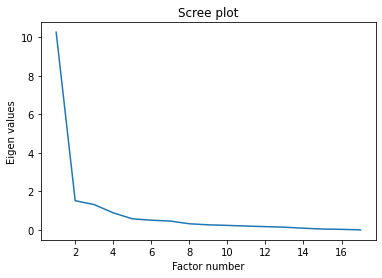

Les valeurs propres sont supérieures à 1 jusqu'au 3ème facteur. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente un éventuel intérêt.
La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des « bâtons brisés » q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes


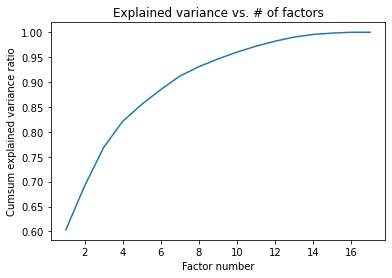

Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points


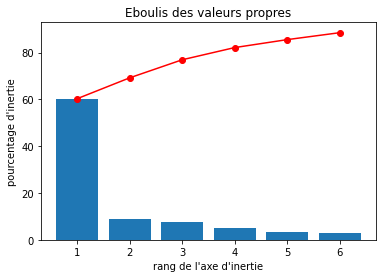

Le premier facteur contient 60% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de 70% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.


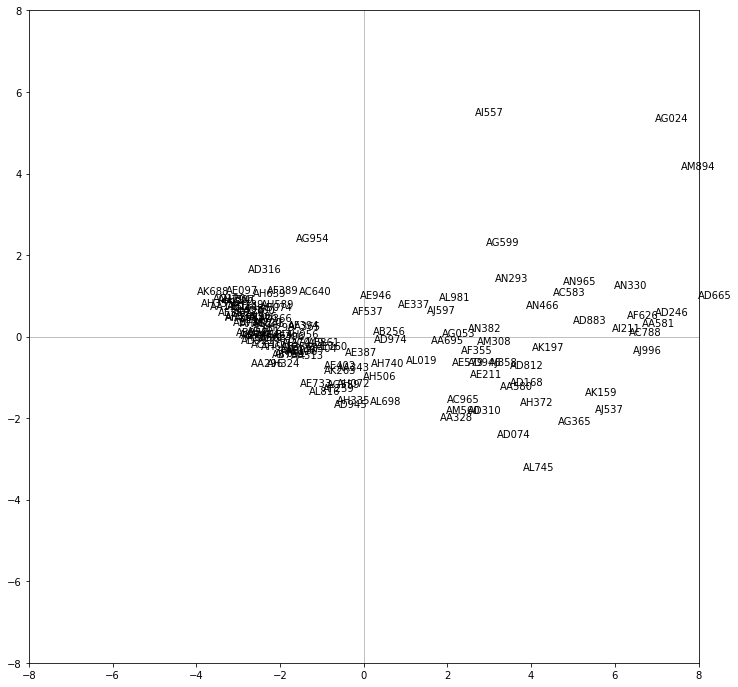

Un groupe d'individus est concentré entre le milieu du côté gauche du premier axe et le centre du 1er axe. Ce groupe parait donc homogène par rapport à certaines caractéristiques. Les individus AK688 et AD316 peuvent se ressembler. En dehors de ce groupe d'individus, le reste de la population est dispersée de part et d'autres à droite du 1er axe. Les individus AD665 et AD246 peuvent avoir des ressemblances. L'individu AD665 est opposé à l'individu AK688. Ces individus peuvent ne pas avoir de ressemblance. Nous observons trois individus isolés en haut à droite du second axe.  Il serait intéressant de vérifier le poids qu'ont ces individus sur cette représentation.
        ID        d_i
0    AA003   8.134634
1    AA115  15.070343
2    AA296  11.908476
3    AA328  15.602426
4    AA343   4.069687
..     ...        ...
118  AN293  19.703268
119  AN330  47.393384
120  AN382  16.851803
121  AN466  29.225101
122  AN965  32.865072

[123 rows x 2 columns]
2091.0
Les individus AG024, AM894 ou enc

<ipython-input-44-461fcd14cef2>:207: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
<ipython-input-44-461fcd14cef2>:212: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-44-461fcd14cef2>:217: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-44-461fcd14cef2>:221: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-44-461fcd14cef2>:225: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  str(list(round(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-44-461fcd14cef2>:232: UserWarning: Boolean Series key will be reindexed to match DataFrame index

['poms_score_vigour'] est la variable qui corrèle à moins de -60% à l'axe 1


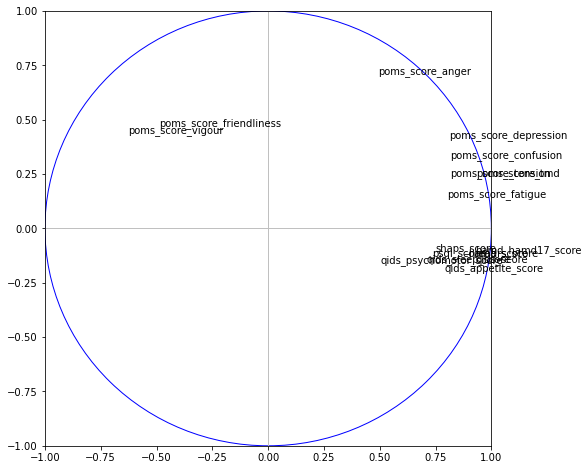

Qualité de représentation des variables
Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont ['madrs_score', 'hamd_hamd17_score', 'hama_score', 'poms_score_tension', 'poms_score_depression', 'poms_score_anger', 'poms_score_confusion', 'poms_score_tmd', 'qids_score']. Leur représentation dans le cercle des corrélations est fiable

Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont ['shaps_score', 'psqi_score', 'poms_score_fatigue', 'poms_score_friendliness', 'poms_score_vigour', 'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score']. Leur représentation dans le cercle des corrélations n'est pas fiable
verifions la théorie cos2var
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vérifions la théorie ctrvar
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [44]:
#sous-ensemble des scores de shaps, psqi, hamd17, hama, qids, madrs et poms

X = demo_net_spd[['shaps_score', 'psqi_score','madrs_score', 'hamd_hamd17_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score']]


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")

#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES ET REDUITES")
print(Z)

#vérification moyenne
print(np.mean(Z,axis=0))

#vérification écart-type
print(np.std(Z,axis=0,ddof=0))

from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

print("La matrice des valeurs singulières est créée.")

#variances (valeurs propres) associées aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variante expliquée")
print(acp.explained_variance_ratio_)

print("Le premier axe explique 60% de la variance, le second 8.9%")

#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

print("Les valeurs propres sont supérieures à 1 jusqu'au 3ème facteur. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente un éventuel intérêt.")

#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
pd.DataFrame({'Val.Propre':eigval,'Seuils':bs})


print("La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des « bâtons brisés » q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes")


#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

print("Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points")

from sklearn import decomposition
from sklearn import preprocessing
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

    
# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

print("Le premier facteur contient 60% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de 70% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.")

#Représentation des individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-8,8) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

print("Un groupe d'individus est concentré entre le milieu du côté gauche du premier axe et le centre du 1er axe. Ce groupe parait donc homogène par rapport à certaines caractéristiques. Les individus AK688 et AD316 peuvent se ressembler. En dehors de ce groupe d'individus, le reste de la population est dispersée de part et d'autres à droite du 1er axe. Les individus AD665 et AD246 peuvent avoir des ressemblances. L'individu AD665 est opposé à l'individu AK688. Ces individus peuvent ne pas avoir de ressemblance. Nous observons trois individus isolés en haut à droite du second axe.  Il serait intéressant de vérifier le poids qu'ont ces individus sur cette représentation.")

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

#vérifions la somme des di

print(np.sum(di,axis=0))

#afficher le df en entier
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
df = pd.DataFrame({'ID':X.index,'d_i':di})
df.sort_values(by = 'd_i',ascending = False)


print("Les individus AG024, AM894 ou encore AD665 pèsent le plus pour la détermination du facteur 1, on les retrouve par ailleurs aux extrémités de notre nuage de points. Nous pouvons alors déduire la qualité de représentation des individus pour les deux facteurs")


#afficher le df en entier
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

print("Qualité de représentation – Les COS² (cosinus carré).")
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

cos2_sum = pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'somme':cos2[:,0]+cos2[:,1]})
cos2_sum.sort_values(by = 'somme',ascending = False)

#proportion des individus ayant une corrélation avec les axes supérieure à 0.7 
ab = (cos2_sum.somme >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus ont une corrélation aux 2 axes supérieure à 0.7. Ceux-sont ceux qui sont bien projetés")


cos2_sum[cos2_sum.COS2_1 >=0.7].sort_values(by = 'COS2_1', ascending = False)

print("les individus " + str(list(cos2_sum[cos2_sum.COS2_1 >=0.7].id)[:3]) + " ont une corrélation supérieure à 0.7 au 1er axe")
print("les individus " + str(list(cos2_sum[cos2_sum.COS2_2 >=0.7].id)[:3]) + " ont une corrélation supérieure à 0.7 au 1er axe")

cos2_sum.sort_values(by = 'COS2_1',ascending = False)

#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

#vérifions la théorie
print("vérifions la théorie - somme en colonne des CTR")
print(np.sum(ctr,axis=0))

#Représentation des variables

#le champ components_ de l'objet ACP
print(acp.components_)
#les facteurs sont en ligne, les variables en colonne

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

#Les variables sont maintenant en ligne, les facteurs en colonne :


#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
               .sort_values(by = 'COR_2', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
                 .COR_2 >= 0.7)].id)) + " est la variable qui corrèle à plus de 70% à l'axe 2")

list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)

print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de +70% à l'axe 1. " + 
      str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)[:1]) + " étant la variable avec le coefficient le plus élevé soit " + 
      str(list(round(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                     .sort_values(by = 'COR_1', ascending = False)
                     [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                       .COR_1 >= 0.7)].COR_1*100,1)[:1])) + 
      "%" )
print()
print()
print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 <= -0.6)].id)) + 
      " est la variable qui corrèle à moins de -60% à l'axe 1")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#qualité de représentation des variables
print("Qualité de représentation des variables")

#cosinus carré des variables
cos2var = corvar**2
cos2var_df = pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'somme':cos2var[:,0]+cos2var[:,1]})
cos2var_df.sort_values(by = 'somme',ascending = False)


print("Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont " + 
      str(list(cos2var_df[(cos2var_df.somme >= 0.7)].id)) +
     ". Leur représentation dans le cercle des corrélations est fiable")
print("")

var_rpz_insuf = list(cos2var_df[(cos2var_df.somme < 0.7)].id)

print("Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont " + 
      str(var_rpz_insuf) +
     ". Leur représentation dans le cercle des corrélations n'est pas fiable")

#vérifions la théorie
print("verifions la théorie cos2var")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1
#donc qualité de représentation des variables bonne

#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
ctrvar_df = pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'somme':ctrvar[:,0]+ctrvar[:,1]})
ctrvar_df.sort_values(by = 'somme',ascending = False)

list(ctrvar_df.sort_values(by = 'somme',ascending = False).id)[:2]

print("vérifions la théorie ctrvar")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes sont égales à 1 cette fois-ci.






Les variables poms_score_tmd, qids_score, madrs_score, hamd_hamd17_score, hama_score, poms_score_tension, poms_score_confusion, poms_score_depression, poms_score_fatigue, qids_appetite_score, shaps_score, psqi_score, qids_sleep_score semblent fournir des informations plus ou moins similaires. Des scores élevés à ces échelles semblent expliquer l'axe 1, puisqu'ils sont très fortement corrélés. Cependant, les variables shaps_score, psqi_score, poms_score_fatigue, poms_score_friendliness, poms_score_vigour, qids_sleep_score, qids_appetite_score et qids_psychomotor_score sont mal représentées sur le plan. La dispertion des individus sur le plan peut donc être expliquée par poms_score_tmd, qids_score, madrs_score, hamd_hamd17_score, hama_score, poms_score_tension, poms_score_confusion et poms_score_depression. Ainsi, ces échelles mesurant la sévérité de la dépression, on peut supposer que l'axe 1 fournit les informations concernant la sévérité de la dépression. Les individus se trouvant à gauche du centre du plan devraient donc être les individus sains, tandis que ceux qui se trouvent à droite devraient souffrir d dépression. Aussi, plus leur dépression est sévère, plus ils devraient se situer à droite. Les individus sains étant fortement groupés au niveau de l'axe 1, les échelles sus-mentionnées ne semblent pas les distinguer entre eux. En revanche, on observe beaucoup plus de dispersion pour les individus à droite, donc de bonnes distinctions entre les individus qui souffrent de dépression. 
La variable poms_score_anger relative à l'agressivité est bien représentée sur le plan et explique à elle-seule l'axe 2 mais ne semble pas fournir d'informations quant à l'axe 1, que nous supposons être la sévérité de la dépression.

Les variables shaps_score, psqi_score, poms_score_fatigue, poms_score_friendliness, poms_score_vigour, qids_sleep_score, qids_appetite_score et qids_psychomotor_score ont une mauvaise projection sur le plan. 

In [45]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

In [46]:
#Informations supplémentaires

#Nous récupérons les variables quantitatives dans une structure à part.
#variables supplémentaires quanti
varSupp = demo_net_spd[['hs_CRP', 'age','ctq_score','tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score']]
vsQuanti = demo_net_spd[['hs_CRP', 'age','ctq_score','tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score']].values
print(vsQuanti)




[[ 0.4 45.  30.  ... 35.   7.   6. ]
 [ 6.9 44.  25.  ... 41.  14.   1. ]
 [ 0.6 27.  26.  ... 40.   5.   3. ]
 ...
 [ 0.4 25.  75.  ... 41.   7.   1. ]
 [31.5 28.  51.  ... 23.  14.   2. ]
 [ 0.3 29.  31.  ... 15.   3.   2. ]]


In [47]:
#Nous calculons les corrélations de ces variables avec les axes factoriels exprimés par les coordonnées des observations.
#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))
for k in range(p):
 for j in range(vsQuanti.shape[1]):
     corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]

#affichage des corrélations avec les axes
print(corSupp)

#Nous avons une matrice (... x p), 2 parce que ... variables illustratives, p est le nombre total de composantes générées.

[[ 1.00493501e-01  1.72620573e-02  7.08026713e-02 -1.54361253e-01
  -4.51986619e-02 -1.21500950e-01  1.19335159e-01  3.44633247e-02
  -3.70966389e-02 -5.54841921e-02 -2.90459124e-02 -2.17674227e-01
  -1.36052557e-01 -8.38487846e-02  1.61260469e-02  2.37886126e-02
  -1.04710067e-01]
 [ 1.52490784e-01  8.96673118e-03 -1.88743821e-01 -8.43148344e-03
  -1.73390582e-01 -1.45927012e-01  1.11704945e-01 -2.97754801e-02
   9.27373213e-02  7.89708648e-02  1.57486489e-01 -5.61877700e-02
   1.30691608e-01 -7.81025963e-02  2.51258499e-02 -7.85374581e-02
   1.09730094e-01]
 [ 5.33591144e-01  2.08068885e-02 -1.19058192e-01 -1.09116352e-01
   6.12789658e-02 -7.10475523e-02  9.76607328e-02 -7.69745740e-03
   3.17664211e-02 -3.47009781e-02 -1.94204087e-02  8.21025051e-03
   1.32608327e-01  1.28947309e-01  1.10139914e-01 -1.19207671e-01
  -1.49309705e-01]
 [-3.90984151e-01 -2.61045478e-02 -9.35688767e-02 -9.42783279e-02
   5.68221565e-02  2.62562266e-01 -1.00326880e-01  1.01713375e-01
   1.27393394e-01  

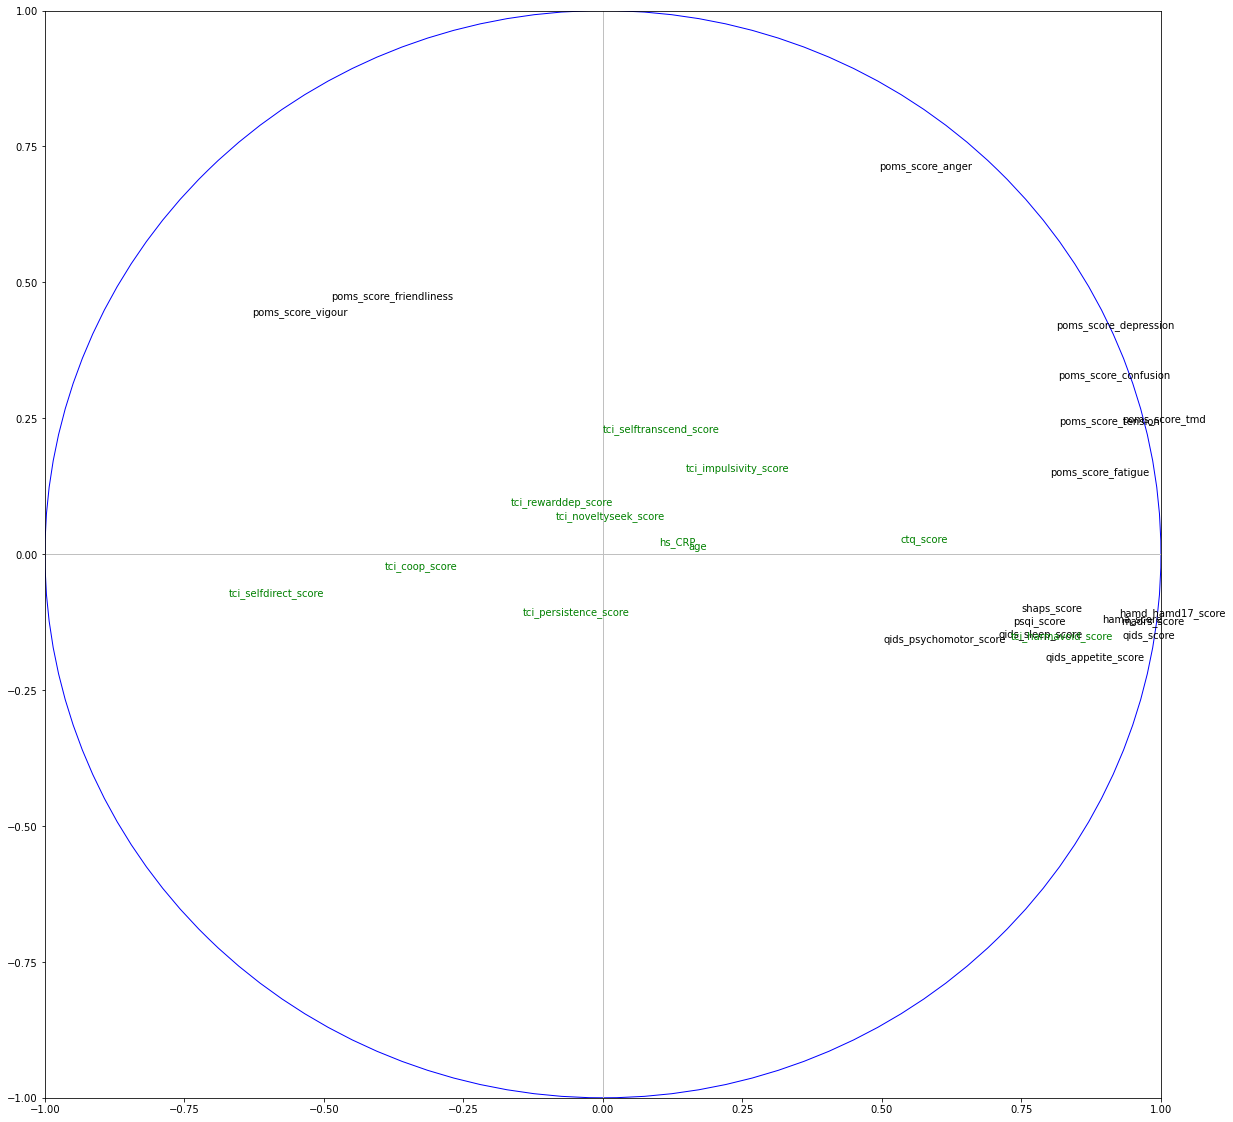

In [48]:
#Avec ces nouvelles coordonnées, nous pouvons placer les variables dans le cercle descorrélations [TUTO_R, page 11].

#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#variables actives
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#variables illustratives
for j in range(vsQuanti.shape[1]):
 plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

La plupart des variables supplémentaires se situent au centre du cercle. La variable tci_harmavoid_score, relative au tempérament de l'évitement du danger, a une corrélation supérieure à 0.7 avec le permier axe, qui est très bien expliqué par la variable relative au score de mesure de dépression poms_score. A l'inverse, la variable tci_selfdirect_score, relative au caractère déterminé, a une corrélation inférieure à -0.6 au premier axe. Il existe une relation inverse entre la détermination et la dépression

      Diag
AA003   HC
AA115   HC
AA296   HC
AA328  MDD
AA343  MDD
AA365   HC
AA418   HC
AA513   HC
AA580  MDD
AA581  MDD
AA695  MDD
AB052   HC
AB074   HC
AB256  MDD
AB735   HC
AB739   HC
AC583  MDD
AC610   HC
AC640   HC
AC760  MDD
AC788  MDD
AC965  MDD
AD074  MDD
AD168  MDD
AD246  MDD
AD310  MDD
AD316   HC
AD366   HC
AD421   HC
AD665  MDD
AD812  MDD
AD883  MDD
AD921   HC
AD945   HC
AD946  MDD
AD974   HC
AE097   HC
AE151   HC
AE176  MDD
AE211  MDD
AE337   HC
AE350   HC
AE387   HC
AE396   HC
AE402   HC
AE579  MDD
AE733   HC
AE760   HC
AE861   HC
AE946   HC
AF047   HC
AF051   HC
AF259   HC
AF279   HC
AF338   HC
AF355  MDD
AF356   HC
AF389   HC
AF394   HC
AF443   HC
AF517   HC
AF537  MDD
AF626  MDD
AF787   HC
AF978   HC
AG024  MDD
AG036   HC
AG053  MDD
AG120   HC
AG245   HC
AG365  MDD
AG449   HC
AG559   HC
AG599  MDD
AG954   HC
AH072   HC
AH139   HC
AH299   HC
AH307   HC
AH324   HC
AH335   HC
AH355   HC
AH372  MDD
AH408   HC
AH506  MDD
AH589   HC
AH639   HC
AH645   HC
AH687   HC
AH740   HC

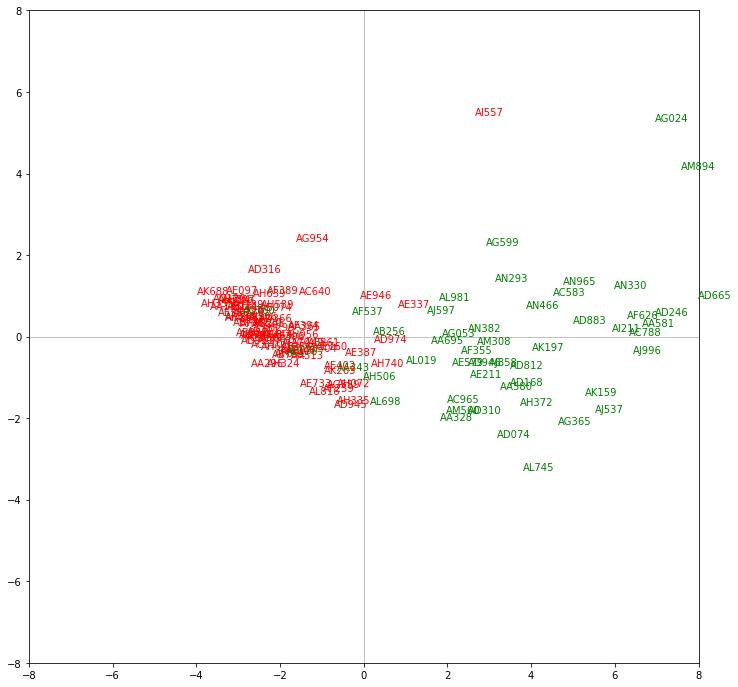

In [49]:
#on isole les variables quali
#traitement de var. quali supplémentaire

vsQuali = demo_net_spd[['Diag']]
print(vsQuali)

#Puis nous récupérons la liste des modalités.
#modalités de la variable qualitative
modalites = np.unique(vsQuali)
print(modalites)


#Nous représentons les individus dans le plan factoriel, coloriées selon la modalité associée de la variable illustrative. 

#liste des couleurs
couleurs = ['r','g']
#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8)
axes.set_ylim(-8,8)
#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
 #numéro des individus concernés
 numero = np.where(vsQuali == modalites[c])
 #les passer en revue pour affichage
 for i in numero[0]:
     plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

#Les couleurs sont définies par la variable couleurs qui est une liste avec les abréviations de {‘r’ : rouge, ‘v’ : vert} pour {'HC' 'MDD'}.


In [50]:
print("L'individu AC760 est dans la classe des " + str(demo_net_pd.PrimaryDiagnosis.loc['AC760']) + ". Il est en rémission, ce qui explique pourquoi il est situé dans la borne inférieure du premier axe")
print()
print("L'individu AE176 est dans la classe des " + str(demo_net_pd.PrimaryDiagnosis.loc['AE176']) + ". Il est en rémission, ce qui explique pourquoi il est situé dans la borne inférieure du premier axe")



L'individu AC760 est dans la classe des Major_Depressive_Disorder,_Single_Episode,_In_Partial_Remission. Il est en rémission, ce qui explique pourquoi il est situé dans la borne inférieure du premier axe

L'individu AE176 est dans la classe des Major_Depressive_Disorder,_Recurrent,_In_Partial_Remission. Il est en rémission, ce qui explique pourquoi il est situé dans la borne inférieure du premier axe


          sex
AA003  Female
AA115  Female
AA296    Male
AA328    Male
AA343  Female
AA365    Male
AA418    Male
AA513  Female
AA580  Female
AA581    Male
AA695  Female
AB052  Female
AB074    Male
AB256  Female
AB735  Female
AB739    Male
AC583    Male
AC610    Male
AC640  Female
AC760  Female
AC788  Female
AC965  Female
AD074  Female
AD168  Female
AD246    Male
AD310    Male
AD316    Male
AD366  Female
AD421  Female
AD665    Male
AD812  Female
AD883  Female
AD921  Female
AD945  Female
AD946  Female
AD974  Female
AE097    Male
AE151  Female
AE176    Male
AE211  Female
AE337    Male
AE350  Female
AE387  Female
AE396  Female
AE402  Female
AE579  Female
AE733  Female
AE760  Female
AE861  Female
AE946    Male
AF047  Female
AF051    Male
AF259    Male
AF279  Female
AF338    Male
AF355    Male
AF356  Female
AF389    Male
AF394  Female
AF443  Female
AF517    Male
AF537    Male
AF626  Female
AF787    Male
AF978    Male
AG024  Female
AG036    Male
AG053    Male
AG120    Male
AG245  Female
AG365 

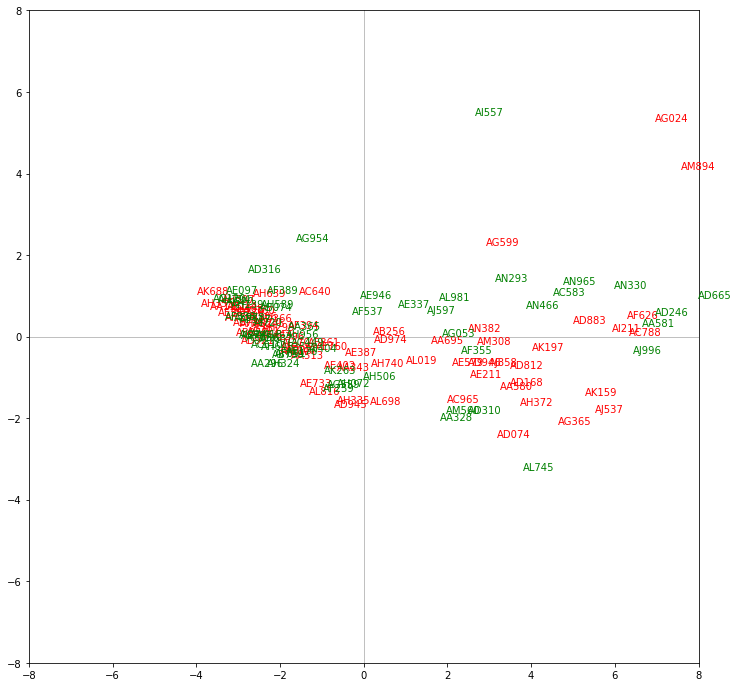

In [51]:
#on isole les variables quali
#traitement de var. quali supplémentaire

vsQuali = demo_net_spd[['sex']]
print(vsQuali)

#Puis nous récupérons la liste des modalités.
#modalités de la variable qualitative
modalites = np.unique(vsQuali)
print(modalites)


#Nous représentons les individus dans le plan factoriel, coloriées selon la modalité associée de la variable illustrative. 

#liste des couleurs
couleurs = ['r','g']
#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8)
axes.set_ylim(-8,8)
#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
 #numéro des individus concernés
 numero = np.where(vsQuali == modalites[c])
 #les passer en revue pour affichage
 for i in numero[0]:
     plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

#Les couleurs sont définies par la variable couleurs qui est une liste avec les abréviations de {‘r’ : rouge, ‘v’ : vert} pour {'HC' 'MDD'}.

Parmi les personnes en dépression, la plupart des hommes sont situés sur la borne positive du deuxième axe (qui est expliquée par la colère), la plupart des femmes sont situées sur la borne négative du deuxième. 

In [52]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

123 observations et 7 variables.
VALEURS CENTREES ET REDUITES
[[ 0.70845125 -0.72276622 -0.71892219 -0.21976227 -0.64371497 -0.00912539
  -0.61316989]
 [ 0.12557831 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [ 0.70845125 -0.72276622 -0.71892219 -0.85578013 -0.64371497 -0.4580948
  -0.86948219]
 [ 1.58276064 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [-0.45729462  0.09283236  0.54132621 -0.5377712   0.04478017 -0.4580948
  -0.0364672 ]
 [-0.74873108 -0.11106729  1.38149181  0.73426452  0.73327532  2.90917571
   1.50140664]
 [ 0.41701478 -0.72276622 -0.92896359 -0.21976227 -0.64371497 -0.4580948
  -0.80540412]
 [ 0.70845125 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [ 0.41701478 -0.72276622 -0.71892219 -0.21976227 -0.2994674  -0.4580948
  -0.67724796]
 [-1.33160402  2.74352775  1.59153321  4.8683806   1.76601804 -0.4580948
   2.52665586]
 [ 0.70845125 -0.31496693 -0.71892219 -0.21976227 -0.643

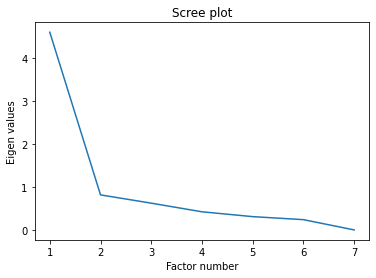

Les valeurs propres sont supérieures à 1 au premier. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente unéventuel intérêt.
     Val.Propre    Seuils
0  4.595177e+00  2.592857
1  8.145065e-01  1.592857
2  6.219064e-01  1.092857
3  4.212121e-01  0.759524
4  3.086444e-01  0.509524
5  2.385539e-01  0.309524
6  1.791740e-32  0.142857
La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des bâtons brisés q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes


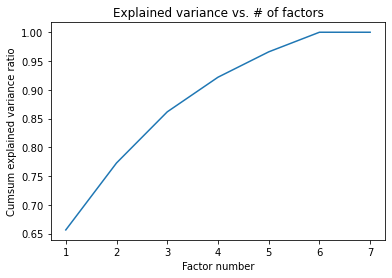

Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points


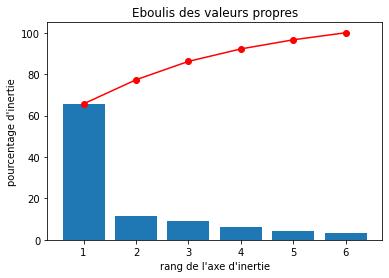

Le premier facteur contient 66.0% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de 77.0% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.


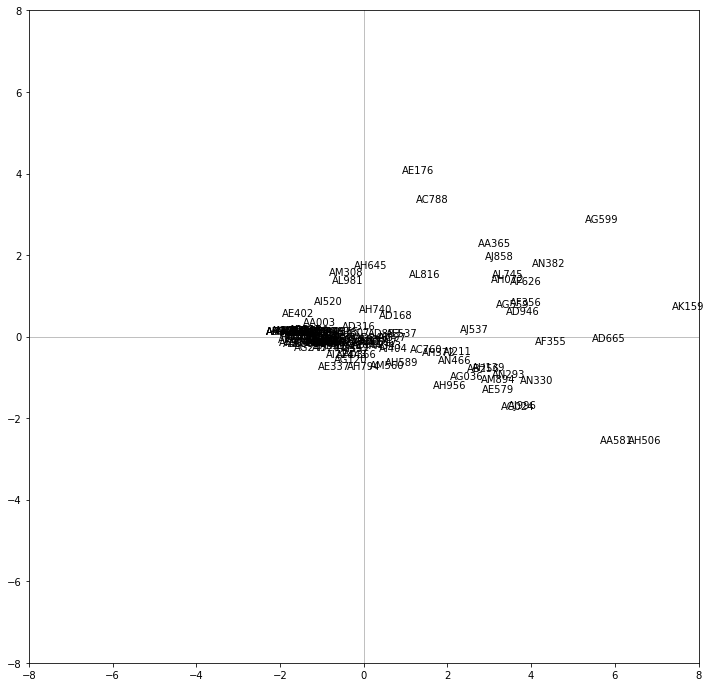

Un groupe d'individus est concentré au milieu du plan. Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, le reste de la population est dispersée de part et d'autres à droite du 1er axe.
contribution des individus dans l'inertie totale
        ID        d_i
0    AA003   2.379868
1    AA115   3.629248
2    AA296   3.653722
3    AA328   6.118610
4    AA343   1.013154
5    AA365  14.275816
6    AA418   2.880457
7    AA513   4.115382
8    AA580   2.019633
9    AA581  45.246882
10   AA695   2.166449
11   AB052   2.704940
12   AB074   3.706331
13   AB256  10.205485
14   AB735   2.373029
15   AB739   3.345296
16   AC583   2.038740
17   AC610   2.086432
18   AC640   3.418676
19   AC760   6.174466
20   AC788  12.914809
21   AC965   2.699350
22   AD074   1.179634
23   AD168   6.295090
24   AD246   2.719850
25   AD310   2.533610
26   AD316   2.172588
27   AD366   1.521714
28   AD421   4.613254
29   AD665  31.449919
30   AD812   3.629248
31

<ipython-input-54-3ef7d5d709f6>:207: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
<ipython-input-54-3ef7d5d709f6>:212: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-54-3ef7d5d709f6>:217: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-54-3ef7d5d709f6>:220: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de +70% à l'axe 1. " + str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-54-3ef7d5d709f6>:223: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .COR_1 >= 0.7)].id)[:1]) + " étant la variable avec le coefficient le plus élevé soit " +

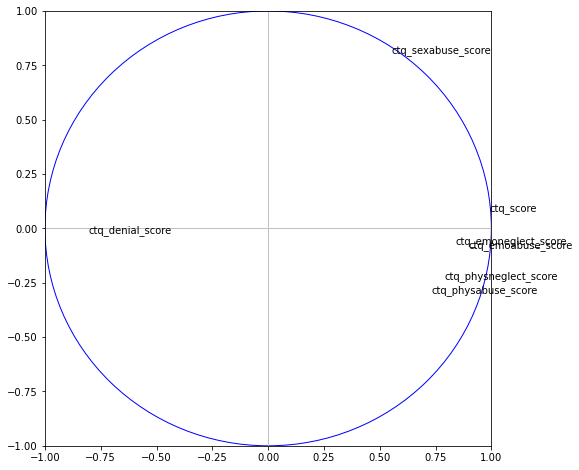

Qualité de représentation des variables
Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont ['ctq_emoabuse_score', 'ctq_emoneglect_score', 'ctq_sexabuse_score', 'ctq_score']. Leur représentation dans le cercle des corrélations est fiable

Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont ['ctq_denial_score', 'ctq_physabuse_score', 'ctq_physneglect_score']. Leur représentation dans le cercle des corrélations n'est pas fiable
verifions la théorie cos2var
[1. 1. 1. 1. 1. 1. 1.]
vérifions la théorie ctrvar
[1. 1. 1. 1. 1. 1. 1.]


In [54]:
#sous-ensemble des scores des variables ctq


X = demo_net_spd.filter(regex=("ctq.*"))


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")


#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES ET REDUITES")
print(Z)

#vérification moyenne
print(np.mean(Z,axis=0))

#vérification écart-type
print(np.std(Z,axis=0,ddof=0))

from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

print("La matrice des valeurs singulières est créée.")

#variances (valeurs propres) associées aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variante expliquée")
print(acp.explained_variance_ratio_)

print("Le premier axe explique "+ 
      str(round(acp.explained_variance_ratio_[0],2)*100) + 
      "% de la variance, le second " + 
      str(round(acp.explained_variance_ratio_[1],2)*100) + 
      "%. De plus l'ACP est faisable au regard du pourcentage d'inertie à 40% d' indépendance entre variables pour plus de 100 individus et 7 variables.")

#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

print("Les valeurs propres sont supérieures à 1 au premier. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente unéventuel intérêt.")

#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


print("La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des bâtons brisés q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes")


#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

print("Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points")

from sklearn import decomposition
from sklearn import preprocessing
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

    
# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

print("Le premier facteur contient " + 
      str(round(acp.explained_variance_ratio_[0],2)*100) +
      "% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de " +
      str(round(acp.explained_variance_ratio_[0] + acp.explained_variance_ratio_[1] ,2)*100) +
      "% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.")

#Représentation des individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-8,8) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

print("Un groupe d'individus est concentré au milieu du plan."
      " Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, "
      "le reste de la population est dispersée de part et d'autres "
      "à droite du 1er axe.")


#afficher le df en entier
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
df_di = pd.DataFrame({'ID':X.index,'d_i':di})
print("contribution des individus dans l'inertie totale")
print(df_di)
print(df_di['d_i'].max())


#vérifions la somme des di

print(np.sum(di,axis=0))


print("L'individu AK159 et AH506 pèsent le plus pour la détermination du facteur 1, on les retrouve par ailleurs aux extrémités de notre nuage de points. Nous pouvons alors déduire la qualité de représentation des individus pour les deux facteurs")


print("Qualité de représentation – Les COS² (cosinus carré).")
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

cos2_sum = pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'somme':cos2[:,0]+cos2[:,1]})
cos2_sum.sort_values(by = 'somme',ascending = False)

#proportion des individus ayant une corrélation avec les axes supérieure à 0.7 
ab = (cos2_sum.somme >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus ont une corrélation aux 2 axes supérieure à 0.7. Ceux-sont ceux qui sont bien projetés")


#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

#vérifions la théorie
print("vérifions la théorie - somme en colonne des CTR")
print(np.sum(ctr,axis=0))

#Représentation des variables

#le champ components_ de l'objet ACP
print(acp.components_)
#les facteurs sont en ligne, les variables en colonne

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

#Les variables sont maintenant en ligne, les facteurs en colonne :


#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
               .sort_values(by = 'COR_2', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
                 .COR_2 >= 0.7)].id)) + " est la variable qui corrèle à plus de 70% à l'axe 2")

list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)

print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de +70% à l'axe 1. " + str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)[:1]) + " étant la variable avec le coefficient le plus élevé soit " + str(list(round(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                     .sort_values(by = 'COR_1', ascending = False)
                     [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                       .COR_1 >= 0.7)].COR_1*100,1)[:1])) + "%" )
print()
print()
print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 <= -0.6)].id)) + " est la variable qui corrèle à moins de -60% à l'axe 1")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#qualité de représentation des variables
print("Qualité de représentation des variables")

#cosinus carré des variables
cos2var = corvar**2
cos2var_df = pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'somme':cos2var[:,0]+cos2var[:,1]})
cos2var_df.sort_values(by = 'somme',ascending = False)


print("Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont " + str(list(cos2var_df[(cos2var_df.somme >= 0.7)].id)) +". Leur représentation dans le cercle des corrélations est fiable")
print("")

var_rpz_insuf = list(cos2var_df[(cos2var_df.somme < 0.7)].id)

print("Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont " + str(var_rpz_insuf) +". Leur représentation dans le cercle des corrélations n'est pas fiable")

#vérifions la théorie
print("verifions la théorie cos2var")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1
#donc qualité de représentation des variables bonne

#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
ctrvar_df = pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'somme':ctrvar[:,0]+ctrvar[:,1]})
ctrvar_df.sort_values(by = 'somme',ascending = False)

list(ctrvar_df.sort_values(by = 'somme',ascending = False).id)[:2]

print("vérifions la théorie ctrvar")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes sont égales à 1 cette fois-ci.

La projection des variables ctq_denial_score, ctq_physabuse_score et ctq_physneglect_score ne sont pas représentatives. Nous ne les prenons pas en compte dans l'analyse.
La variance est expliquée à 66% par le premier axe et à 12% par le second. 
Les variables relatives aux scores de la négligence émotionnelle, de l'abus émotionnel et global du ctq sont fortement corrélées au 1er axe. Les individus se trouvant à droite du plan ont un score élevé des abus et négligences émotionnelles et du score global.
La variable relative à l'abus sexuel explique à elle-seule le 2nd axe. Les individus se situant en haut du plan ont des scores élevé à cette variable.

In [55]:
#sous-ensemble des scores des variables tci


X = demo_net_spd.filter(regex=("tci.*"))


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")


#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES ET REDUITES")
print(Z)

#vérification moyenne
print(np.mean(Z,axis=0))

#vérification écart-type
print(np.std(Z,axis=0,ddof=0))

from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

print("La matrice des valeurs singulières est créée.")

#variances (valeurs propres) associées aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variante expliquée")
print(acp.explained_variance_ratio_)

print("Le premier axe explique "+ 
      str(round(acp.explained_variance_ratio_[0],2)*100) + 
      "% de la variance, le second " + 
      str(round(acp.explained_variance_ratio_[1],2)*100) + 
      "%. De plus l'ACP n'est pas faisable au regard du pourcentage d'inertie à 36.3% pour 95% des valeurs si indépendance entre variables pour plus de 100 individus et 7 variables. Ce plan d'ACP n'expliquerait pas plus que ce qu'on aurait eu avec des variables indépendantes")


123 observations et 8 variables.
VALEURS CENTREES ET REDUITES
[[ 0.21839627  0.35066791  0.59231572 -1.41844951  0.31998904  0.32115552
  -1.02449641  0.9257163 ]
 [ 1.13209497  0.57590109 -1.94913196 -0.30718015  0.79418966  0.99833489
   0.0739985  -1.15968855]
 [ 0.03565653 -0.66288138 -0.76312304 -1.41844951 -0.62841221  0.88547166
  -1.3383521  -0.32552661]
 [ 0.58387575  1.3642172  -0.76312304  1.3597239   0.55708935 -0.58175029
  -0.55371288 -0.32552661]
 [ 0.21839627  1.70206696 -0.5936932   0.24845453  0.79418966  0.09542907
   1.01556556 -1.15968855]
 [-1.97448061 -0.66288138 -0.5936932   0.24845453 -0.86551252  0.09542907
  -0.23985719  0.9257163 ]
 [ 0.76661549  0.12543474 -2.11856181  0.80408921 -0.86551252  1.22406134
  -0.71064072 -1.57676953]
 [ 0.76661549  0.23805132  0.08402618 -0.30718015  1.26839028  0.99833489
  -0.08292935 -0.74260758]
 [-0.14708321  1.25160061 -0.5936932  -0.30718015 -0.3913119  -0.69461352
   0.38785418 -1.57676953]
 [-2.33996009  1.25160061 -0.

SELECTION DE MODELE AVEC SELECTKBEST - UNIVARIATE FEATURE SELECTION

In [97]:
print(demo_net_spd.columns)
demo_net_spd.shape

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

(123, 48)

In [123]:
X = demo_net_spd[['hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score','ctq_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacite_ressentir',
       'pensee_pessimiste', 'idee_suicidaire']]
y = demo_net_spd[['Diag']]
X.shape

df = X

feature_selector = SelectKBest(chi2, k=3)
X_new = feature_selector.fit_transform(df, y)
X_new.shape

(123, 3)

In [124]:
df.columns[feature_selector.get_support()]

Index(['madrs_score', 'hamd_hamd21_score', 'hama_score'], dtype='object')

# MODELE DE CLASSIFICATION

(123, 3)

(123, 1)


c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
(array([0.98648649, 0.97959184]), array([0.98648649, 0.97959184]), array([0.98648649, 0.97959184]), array([74, 49], dtype=int64))
Confusion matrix, without normalization
[[73  1]
 [ 1 48]]
la précision est de 0.9795918367346939
le recall est de 0.9795918367346939
L'accuracy est de 1.0


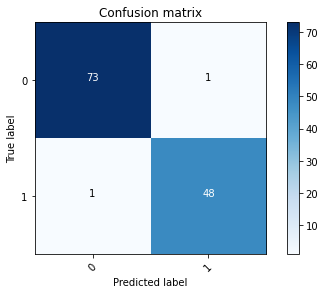

In [126]:
['madrs_score', 'hamd_hamd21_score', 'hama_score']


X = demo_net_spd[['madrs_score', 'hamd_hamd21_score', 'hama_score']].values
y = demo_net_spd[['Diag']].values

print(X.shape)
print()
print(y.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)



for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = LogisticRegressionCV()
    #clf = RandomForestClassifier(max_depth=10, random_state=0,class_weight={0:1,1:1},n_jobs=-1)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print(acc)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import itertools

from sklearn.metrics import precision_recall_fscore_support
ypredict=clf.predict(X)
print(precision_recall_fscore_support(y, ypredict))

cnf_matrix = metrics.confusion_matrix(y, ypredict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix')

#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

print("la précision est de " + str(48/(48+1)))
print("le recall est de " + str(48/(48+1)))
print("L'accuracy est de " + str(acc))
